In [1]:
from fastai.vision.all import *
import fastai
import timm
import albumentations as A
import torch
torch.cuda.set_device(2)

In [4]:
import os
def create_csvValid(path):
    output_path = os.path.join(path,"..","df_regression_test.csv")
    if (os.path.exists(output_path)):
        output_path_csv = open(output_path, "a")
    else:
        output_path_csv = open(output_path, "w")
        head = "images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12\n"
        output_path_csv.write(head)

    
    lista_archivos = list(os.walk(path))
    lista_archivos.sort()
    for carpeta in lista_archivos:
#         print(carpeta[0])
        video = carpeta[0].split(os.path.sep)[-1]
        for files in carpeta[2]:
            if "images_labelSmoothing.csv" in files:
                leer = open(os.path.join(carpeta[0],files))
                leer.readline()
                for l in leer:
                    escribir = ""
                    l = l.split(",")
                    for clas in l[1:]:
                        escribir= escribir + str(float(clas))+","

                    escribir = escribir[:-1]
#                     if len(escribir)==0:
#                         escribir = escribir+ "0"
                    escribir = escribir + "\n"
                    output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+","+escribir)
#                     print(l)

In [5]:
# import os
# def create_csvValid(path):
#     output_path = os.path.join(path,"..","df_regression_test.csv")
#     if (os.path.exists(output_path)):
#         output_path_csv = open(output_path, "a")
#     else:
#         output_path_csv = open(output_path, "w")
#         head = "images, class\n"
#         output_path_csv.write(head)

    
#     lista_archivos = list(os.walk(path))
#     lista_archivos.sort()
#     for carpeta in lista_archivos:
#         video = carpeta[0].split(os.path.sep)[-1]
#         for files in carpeta[2]:
#             if "images_labelSmoothing.csv" in files:
#                 leer = open(os.path.join(carpeta[0],files))
#                 leer.readline()
#                 for l in leer:
#                     escribir = ""
#                     l = l.split(",")
#                     for clas in l[1:]:
#                         if float(clas)>0:
#                             escribir= escribir +str(l.index(clas)-1) +" "
#                     escribir = escribir[:-1]
#                     if len(escribir)==0:
#                         escribir = escribir+ "0"
#                     regression = [0 for i in range(0, 13)]
#                     for c in escribir.split(" "):
#                         regression[int(c)] = 1
# #                     output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+","+escribir)
#                     output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+";"+str(regression)+ "\n")
                

In [6]:
create_csvValid("./dataset_split_38frames/test")

In [7]:
import pandas as pd
import numpy as np

dfValid = pd.read_csv('./dataset_split_38frames/df_regression_train.csv')
dfTest = pd.read_csv('./dataset_split_38frames/df_regression_test.csv')

# prueba = dfValid

# prueba = prueba.iloc[np.random.permutation(len(prueba))]
# prueba = prueba[0:int(len(prueba)*0.1)]
# # In[6]:
# # Aquí debería hacer dos df diferentes. Uno para entrenamiento y otro para validación. En este caso 
# # usa para entrenar el set de entrenamiento y validación. Imagino que la división la hará por programa
# # dfValid = dfValid[(dfValid.set == 'training') | (dfValid.set == 'validation')]


# # Hay que modificar esto para que haya set de validación. Hacer un vector random y que esté entre las primeras 
# # 0.1 posiciones si está se devuelve 
# def is_valid(path):
#     name = path[0]
# #     return (dfValid[dfValid['challenge_id']==name])['set'].values[0]=='validation'
#     return (dfValid[dfValid['images']==name]).values[0] in prueba.images.values
    
# def get_class(path):
#     name = path[0]
#     return (dfValid[dfValid['images']==name])['class']


In [8]:
dfValid["lista"] = dfValid[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']].values.tolist()
dfValid.head()

,images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12,lista
0,IDU001V001/images/IDU001V001_from_0_to_38,0.789474,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.7894736842105263, 0.21052631578947367, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,IDU001V001/images/IDU001V001_from_19_to_57,0.289474,0.710526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.2894736842105263, 0.7105263157894737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,IDU001V001/images/IDU001V001_from_38_to_76,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,IDU001V001/images/IDU001V001_from_57_to_95,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,IDU001V001/images/IDU001V001_from_76_to_114,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [9]:
dfTest["lista"] = dfTest[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']].values.tolist()

dfTest.head()["lista"].values

array([list([0.9473684210526316, 0.05263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.4473684210526316, 0.5526315789473685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
      dtype=object)

In [10]:
dfValid.dtypes

images       object
class 0     float64
class 1     float64
class 2     float64
class 3     float64
class 4     float64
class 5     float64
class 6     float64
class 7     float64
class 8     float64
class 9     float64
class 10    float64
class 11    float64
class 12    float64
lista        object
dtype: object

In [11]:
# import ast

# dfValid.head().values
# lista = []
# for l in dfValid.values:
#     lista.append(ast.literal_eval(l[1]))
# dfValid["class"] = lista

In [12]:
class TitledList(list, ShowTitle):
    _show_args = {'label': 'text'}
    def show(self, ctx=None, **kwargs):
        "Show self"
        return show_title(self, ctx=ctx, **merge(self._show_args, kwargs))

In [13]:
class ToListTensor(DisplayedTransform):
    "Transform to int tensor"
    # order = 10 #Need to run after PIL transforms on the GPU
    _show_args = {'label': 'text'}
    def __init__(self, split_idx=None,):
        super().__init__(split_idx=split_idx)

    def encodes(self, o): return o
    def decodes(self, o): return TitledList(o)

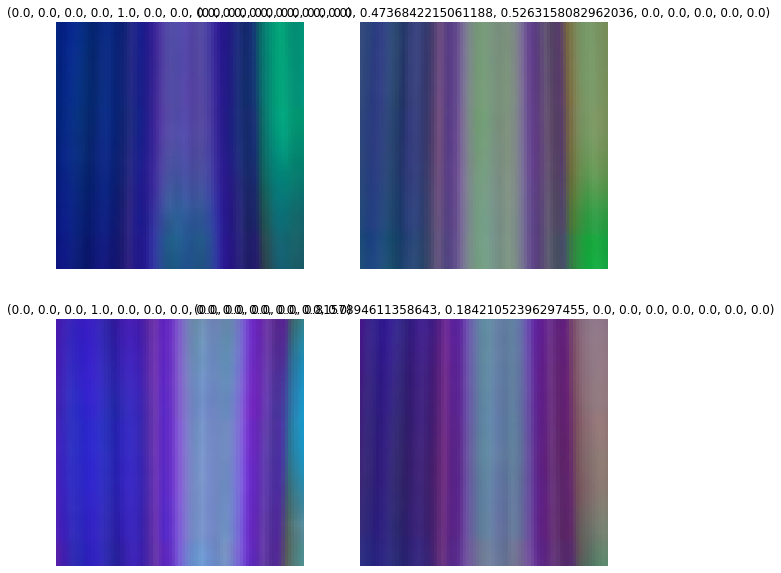

In [14]:
blocks = [ImageBlock, RegressionBlock]

item_tfms = [Resize(100)];# size should be bigger
batch_tfms = [*aug_transforms(size=77, min_scale=0.75,do_flip=False,flip_vert=False,
                  max_rotate=0.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)]
splitter = RandomSplitter()
monitoring = DataBlock(blocks =blocks,
                  get_x = ColReader("images", pref="./dataset_split_38frames/train/",suff='.jpg'),
                  get_y = Pipeline([ColReader("lista"),ToListTensor]),
                  splitter =splitter,
                  item_tfms=item_tfms,
                  batch_tfms = batch_tfms,
                  n_inp = 1
                  )
dls = monitoring.dataloaders(dfValid)
dls.show_batch(nrows=2,ncols=2,figsize=(10,10))

In [15]:
monitoring.summary(dfValid)

Setting-up type transforms pipelines
0                           IDU001V001/images/IDU001V001_from_0_to_38   
1                          IDU001V001/images/IDU001V001_from_19_to_57   
2                          IDU001V001/images/IDU001V001_from_38_to_76   
3                          IDU001V001/images/IDU001V001_from_57_to_95   
4                         IDU001V001/images/IDU001V001_from_76_to_114   
...                                                               ...   
26959  IDU041V006_20220213_203219/images/IDU041V006_from_1558_to_1596   
26960  IDU041V006_20220213_203219/images/IDU041V006_from_1577_to_1615   
26961  IDU041V006_20220213_203219/images/IDU041V006_from_1596_to_1634   
26962  IDU041V006_20220213_203219/images/IDU041V006_from_1615_to_1653   
26963  IDU041V006_20220213_203219/images/IDU041V006_from_1634_to_1672   

        class 0   class 1  class 2  class 3  class 4  class 5  class 6  \
0      0.789474  0.210526      0.0      0.0      0.0      0.0      0.0   
1      0.28

Setting up after_item: Pipeline: Resize -- {'size': (100, 100), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Warp -- {'magnitude': 0.05, 'p': 1.0, 'draw_x': None, 'draw_y': None, 'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'batch': False, 'align_corners': True, 'mode_mask': 'nearest'} -> RandomResizedCropGPU -- {'size': (77, 77), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'max_scale': 1.0, 'p': 1.0} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:2'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:2'), 'axes': (0, 2, 3)}

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -- {

SuggestedLRs(valley=0.010964781977236271)

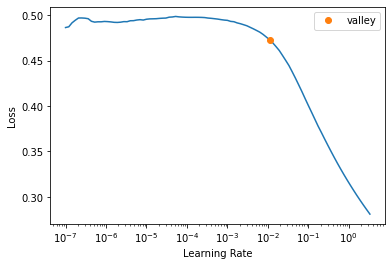

In [16]:
model = resnet18
learn = cnn_learner(dls, model, metrics=[MSELossFlat()], loss_func=L1LossFlat(),y_range=(0,1),)
learn.lr_find()

In [17]:
learn.fine_tune(300,base_lr=3e-2)

epoch,train_loss,valid_loss,None,time
0,0.069844,0.067898,0.063147,00:15


epoch,train_loss,valid_loss,None,time
0,0.069069,0.071438,0.066841,00:17
1,0.067280,0.067783,0.063223,00:17
2,0.068693,0.066806,0.062244,00:17
3,0.067050,0.067002,0.062467,00:17
4,0.067658,0.069026,0.064464,00:17
5,0.067399,0.066109,0.061578,00:17
6,0.066228,0.066866,0.062346,00:17
7,0.067333,0.066938,0.062410,00:17
8,0.066074,0.065666,0.061152,00:17
9,0.066375,0.066277,0.061740,00:17


In [18]:
learn.save("resnetrsRandAugLS_38frames_regression")

Path('models/resnetrsRandAugLS_38frames_regression.pth')

In [19]:
# dl = learn.dls.test_dl(dfTest)
# probs,_ = learn.get_preds(dl=dl)

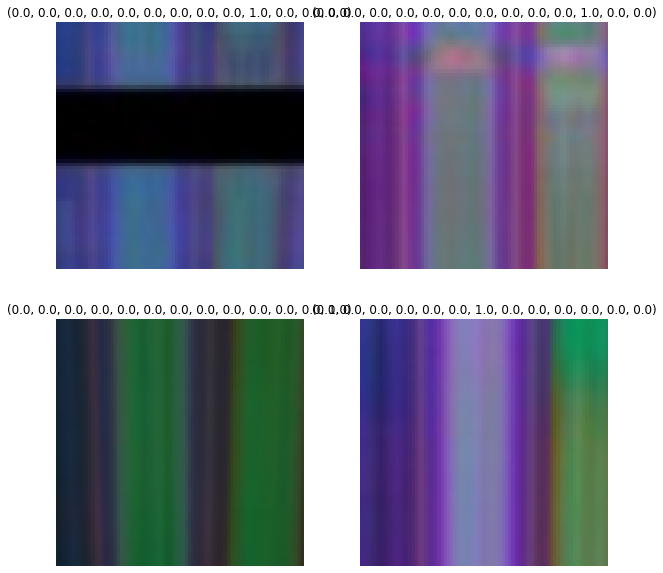

In [20]:
blocks = [ImageBlock, RegressionBlock]

item_tfms = [Resize(100)];# size should be bigger
batch_tfms = [*aug_transforms(size=77, min_scale=0.75,do_flip=False,flip_vert=False,
                  max_rotate=0.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)]
# splitter = RandomSplitter()
monitoring2 = DataBlock(blocks =blocks,
                  get_x = ColReader("images", pref="./dataset_split_38frames/test/",suff='.jpg'),
                  get_y = Pipeline([ColReader("lista"),ToListTensor]),
#                   splitter =splitter,
                  item_tfms=item_tfms,
                  batch_tfms = batch_tfms,
                  n_inp = 1
                  )
dl = monitoring2.dataloaders(dfTest)
dl.show_batch(nrows=2,ncols=2,figsize=(10,10))

In [21]:
learn.dls = dl

In [22]:
learn.validate()

(#2) [0.06608963757753372,0.06144384294748306]

In [23]:
probs,truth = learn.get_preds()

In [24]:
probs

tensor([[1.7416e-08, 1.6068e-08, 1.4374e-08,  ..., 2.0295e-08, 2.9807e-08,
         3.1258e-08],
        [4.5232e-09, 4.3045e-09, 3.4382e-09,  ..., 4.9683e-09, 6.9190e-09,
         7.9276e-09],
        [2.7462e-09, 2.6657e-09, 2.5996e-09,  ..., 2.9337e-09, 3.8800e-09,
         4.4191e-09],
        ...,
        [1.8323e-08, 1.6870e-08, 1.4799e-08,  ..., 2.1438e-08, 3.1548e-08,
         3.2835e-08],
        [2.1098e-09, 2.0638e-09, 2.1361e-09,  ..., 2.2429e-09, 2.9113e-09,
         3.2891e-09],
        [6.5661e-09, 7.0810e-09, 4.1305e-09,  ..., 7.7638e-09, 7.0811e-09,
         7.0632e-09]])

In [25]:
p1 = pd.DataFrame(probs,columns=[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']])
p1['images'] = dfTest.images
cols = ['images','class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']
p1[cols]

,images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12
0,IDU002V001/images/IDU002V001_from_0_to_38,1.741622e-08,1.606776e-08,1.437390e-08,1.508123e-08,1.660248e-08,1.734184e-08,1.799843e-08,1.904676e-08,2.253655e-08,0.0,2.029548e-08,2.980742e-08,3.125776e-08
1,IDU002V001/images/IDU002V001_from_19_to_57,4.523216e-09,4.304482e-09,3.438155e-09,6.463113e-09,4.497656e-09,4.580035e-09,4.533312e-09,4.601532e-09,4.894495e-09,0.0,4.968292e-09,6.918992e-09,7.927596e-09
2,IDU002V001/images/IDU002V001_from_38_to_76,2.746239e-09,2.665734e-09,2.599611e-09,3.687097e-09,2.823406e-09,2.694899e-09,2.714435e-09,2.719540e-09,2.824597e-09,0.0,2.933700e-09,3.879996e-09,4.419085e-09
3,IDU002V001/images/IDU002V001_from_57_to_95,1.812369e-08,1.669416e-08,1.470868e-08,1.487545e-08,1.724391e-08,1.804339e-08,1.875880e-08,1.989101e-08,2.367637e-08,0.0,2.118882e-08,3.116542e-08,3.248619e-08
4,IDU002V001/images/IDU002V001_from_76_to_114,1.839130e-08,1.693401e-08,1.480403e-08,1.480545e-08,1.749032e-08,1.831751e-08,1.904247e-08,2.020355e-08,2.408737e-08,0.0,2.151925e-08,3.165578e-08,3.294017e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,IDU008V003/images/IDU008V003_from_2128_to_2166,1.820768e-08,1.675343e-08,1.481253e-08,1.474882e-08,1.730513e-08,1.811975e-08,1.885659e-08,2.000927e-08,2.386634e-08,0.0,2.130927e-08,3.141100e-08,3.271002e-08
1267,IDU008V003/images/IDU008V003_from_2147_to_2185,1.860806e-08,1.712513e-08,1.492683e-08,1.476830e-08,1.768539e-08,1.853565e-08,1.927469e-08,2.046059e-08,2.443162e-08,0.0,2.179157e-08,3.207222e-08,3.332350e-08
1268,IDU008V003/images/IDU008V003_from_2166_to_2204,1.832320e-08,1.687021e-08,1.479940e-08,1.479410e-08,1.742466e-08,1.824505e-08,1.897188e-08,2.012847e-08,2.399763e-08,0.0,2.143834e-08,3.154802e-08,3.283454e-08
1269,IDU008V003/images/IDU008V003_from_2185_to_2223,2.109803e-09,2.063829e-09,2.136090e-09,2.358765e-09,2.201935e-09,2.036701e-09,2.083180e-09,2.074944e-09,2.144397e-09,0.0,2.242924e-09,2.911315e-09,3.289144e-09


In [26]:
print(probs[5])
# print(predictions[5])
print(truth[5])

tensor([1.2240e-08, 1.1397e-08, 1.0794e-08, 1.5087e-08, 1.1806e-08, 1.2147e-08,
        1.2534e-08, 1.3080e-08, 1.4868e-08, 0.0000e+00, 1.3964e-08, 2.0393e-08,
        2.2311e-08])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(truth, probs)

0.107483946

In [31]:
vis_arr

array([[[411,   2],
        [  9,  21]],

       [[419,   0],
        [ 10,  14]],

       [[376,   9],
        [ 25,  33]],

       [[356,  12],
        [ 44,  31]],

       [[357,  22],
        [ 28,  36]],

       [[398,   3],
        [ 14,  28]],

       [[395,   1],
        [ 13,  34]],

       [[406,   7],
        [  9,  21]],

       [[413,  10],
        [  9,  11]],

       [[417,   2],
        [  9,  15]],

       [[423,   0],
        [  9,  11]],

       [[400,   5],
        [ 18,  20]],

       [[297,  11],
        [ 19, 116]]])

In [26]:
labels = ["".join("c" + str(i)) for i in range(0, 13)]


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

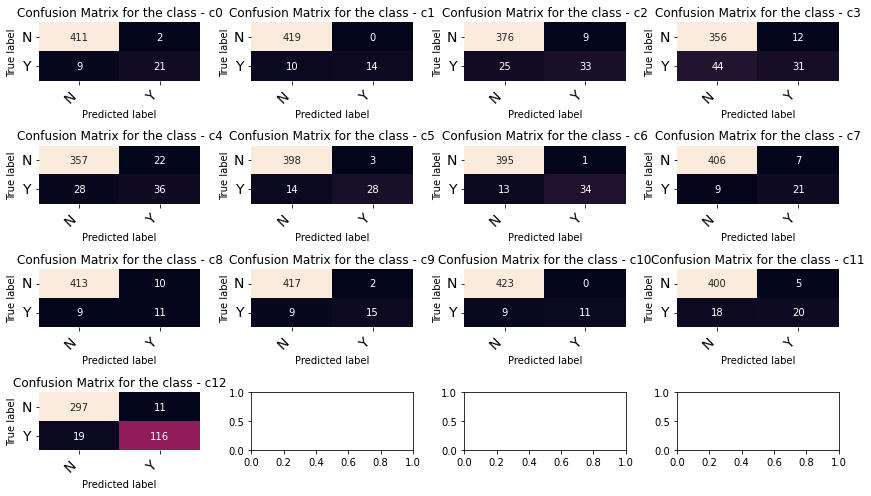

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [31]:
learn1 = Learner(dlsTrain3,timm.create_model('resnetrs50',num_classes=13,pretrained=True),
                metrics=[accuracy,CohenKappa(weights='quadratic')]).to_fp16()

In [37]:
# learn1.load("resnetrsRandAugLS")
learn1 = load_learner("resnetrsRandAugLS_38frames_regression.pkl")
# Si lo cargamos así es porque lo hemos guardado con el export y necesitamos hacer también todo lo anterior menos
# la celda del entrenamiento pero después de haberlo cargado aquí

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [17]:
multilabel_confusion_matrix# learn1.export("resnetrsRandAugLS_77frames_multilabel.pkl")

NameError: name 'learn1' is not defined

In [48]:
multilabel_confusion_matrix(y_true, y_pred)

IndexError: list index out of range

In [41]:
preds,gt = learn1.tta()

In [47]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score
accuracy_score(np.argmax(preds,axis=1),gt)

ImportError: cannot import name 'top_k_accuracy_score'